# Employee Attrition in an Organization

# Importing all necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Analysis

Checking if data contains mising values:

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Observation:
    Dataset is pretty clean and does not contain any null value. We can start with Analysis.

In [ ]:
df.shape

(1470, 35)

# Describe function tell the stastical properties of all the features

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Observation:
    Maximum age of the employee is 60 while the minimum age is 18.We can see that average age of an employee is 36.
    Maximum rate per hour is 100$ while minimum rate per hour is 30$.Averrage hourly rate is 65$.
    Maximum distance that an employee covers from home is 29km.
    1 employee has spent 40 years in the organization.
    
    
    

# Univariate Analysis:

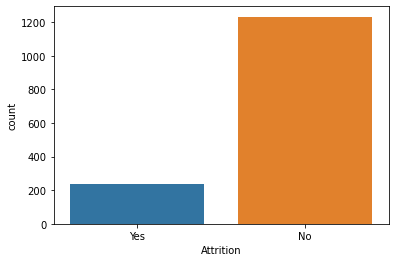

In [ ]:
ax = sns.countplot(x="Attrition", data=df)


# Observation:
    From the above analysis we can see that there are 237 employees who left the organization:There might be alot of reasons, so we will analyze all of them one by one

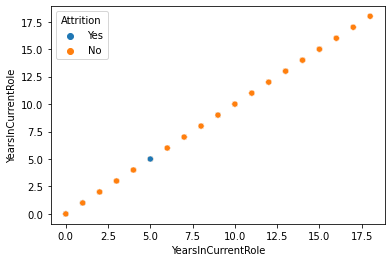

In [ ]:
sns.scatterplot(df['YearsInCurrentRole'],df['YearsInCurrentRole'],hue=df['Attrition'])
plt.show()

# Observation:
    We can see that a person who has spend more than 5 years in current role has not  left the organization:

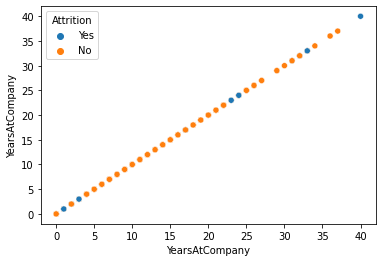

In [ ]:
sns.scatterplot(df['YearsAtCompany'],df['YearsAtCompany'],hue=df['Attrition'])
plt.show()

# Observation:

We can not find any specific information from this observation:

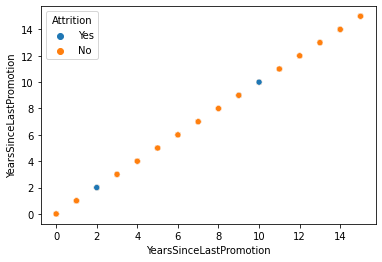

In [ ]:
sns.scatterplot(df['YearsSinceLastPromotion'],df['YearsSinceLastPromotion'],hue=df['Attrition'])
plt.show()

# Observation:
By looking at above graphs it seems that using single variable not much information about the attrition can be observed, one idea can be extracted from the YearAtCompany feature, it shows that attritious people are mostly those with less than five years or more than 25 years, between these years there is no atrition observed.

From the above plots we can clearly see that very few people left the organization.

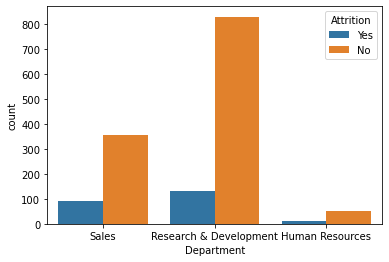

In [ ]:
ax = sns.countplot(df["Department"],hue=df['Attrition'])


# Observation:
Research department employees has more chances to leave the organizations.After that Sales departmend has second most chances to leave the organization.

In [ ]:
(df[['Gender']][df['Attrition']=='Yes']).value_counts()

Gender
Male      150
Female     87
dtype: int64

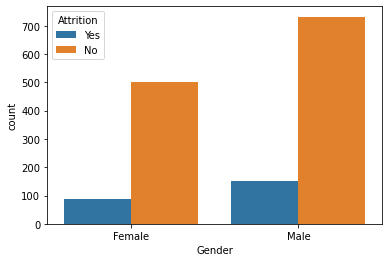

In [ ]:
ax = sns.countplot(df["Gender"],hue=df['Attrition'])


# Observation:
    Male epmployees are leaving the organization more as compare to female which means females as having less chances to leave the organization

In [ ]:
(df[['JobRole']][df['Attrition']=='Yes']).value_counts()

JobRole                  
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

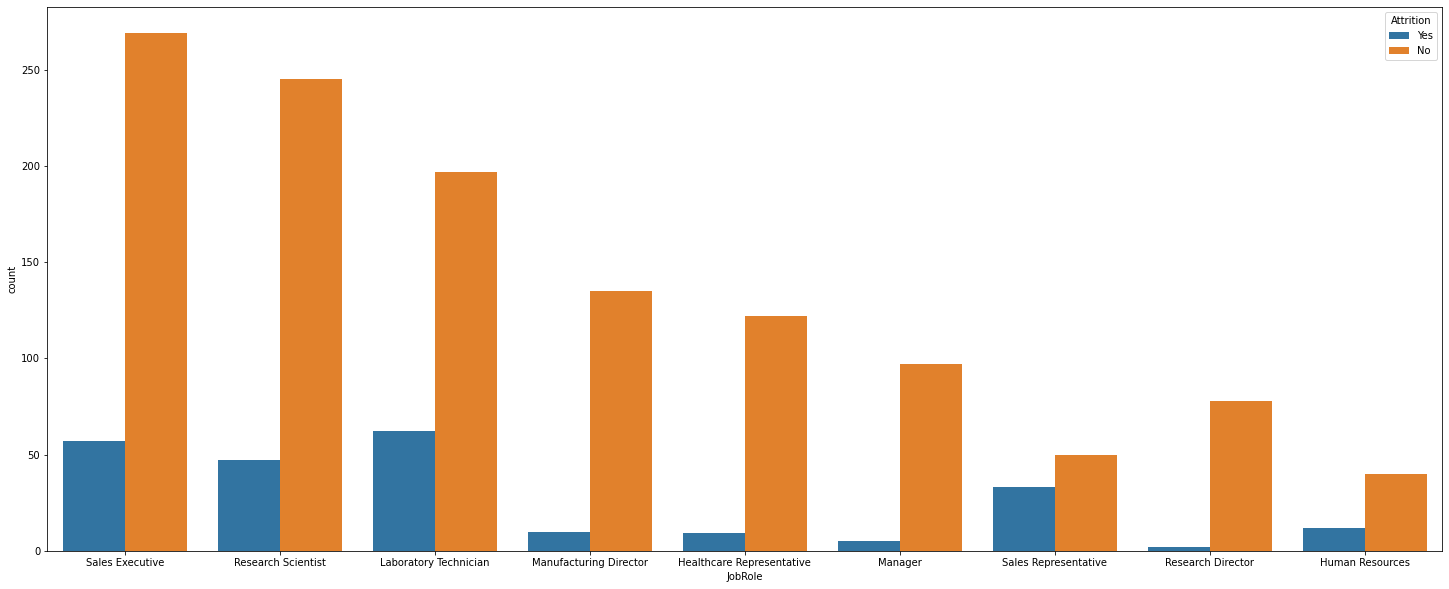

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["JobRole"],hue=df['Attrition'])


# Observation:
    Research Directors mostly does not leave the organization because there are only 2 Attrited employees.
    Laboratory technician are having more chances to leave the organization as compare to other job roles.
    Sales executive employees are having second most chances to leave the organization.

In [ ]:
#selecting object type features to encode
a=df.select_dtypes(include='object')
a.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

# Encoding object type features using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
obj=df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']]
for i in obj.columns:
    df[i]=labelencoder_X.fit_transform(df[i])

# defining inputs and outputs as X and y respectively

In [ ]:
#defining inputs and outputs as X and y respectively
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [ ]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# balancing data using upsampling and downsampling technique

In [ ]:
# define resampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under)])
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [ ]:
y.value_counts()

0    880
1    616
Name: Attrition, dtype: int64

# splitting dataset into training and testing respectively

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Modeling

# Model 1: GaussianNB

<AxesSubplot:>

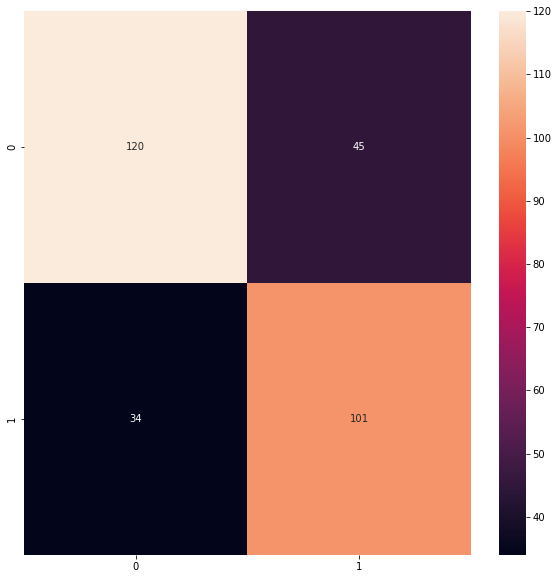

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
dt =GaussianNB()
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
# confusion_matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cm, annot=True, fmt="d")


In [ ]:
print('accuracy',accuracy_score((y_test), y_predict_dt))
print('precision',precision_score(y_test, y_predict_dt))
print('recall',recall_score(y_test, y_predict_dt))

accuracy 0.7366666666666667
precision 0.6917808219178082
recall 0.7481481481481481


# Model 2:KNeighborsClassifier

<AxesSubplot:>

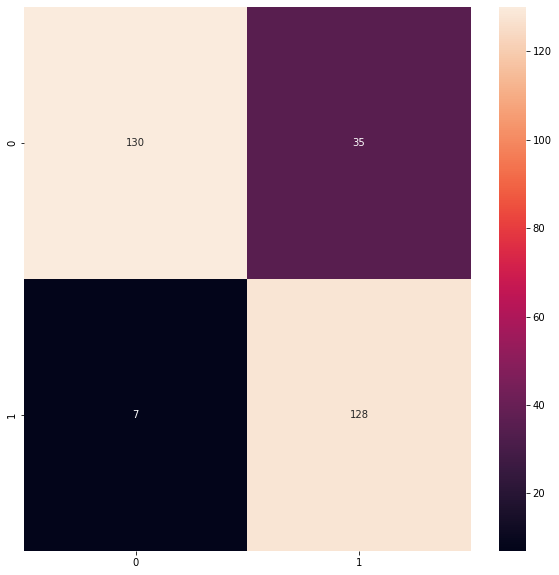

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=1)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
# confusion_matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_predict_knn)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print('accuracy',accuracy_score((y_test), y_predict_knn))
print('precision',precision_score(y_test, y_predict_knn))
print('recall',recall_score(y_test, y_predict_knn))

accuracy 0.86
precision 0.7852760736196319
recall 0.9481481481481482


# Model 3:SVC

<AxesSubplot:>

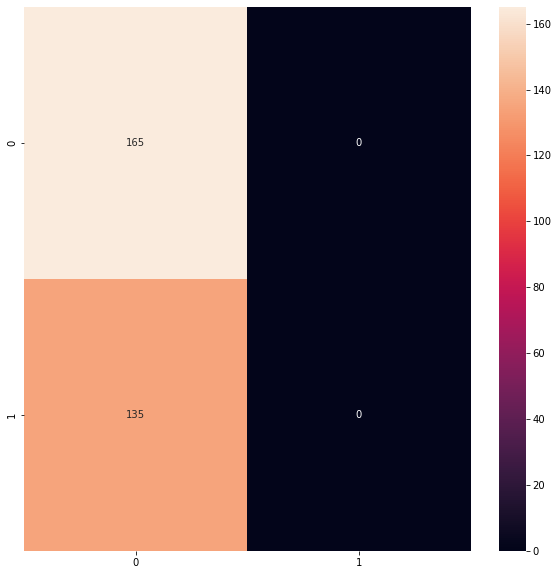

In [ ]:
from sklearn.svm import SVC
rf =SVC() 
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
# confusion_matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf))
print('recall',recall_score(y_test, y_predict_rf))

accuracy 0.55
precision 0.0
recall 0.0
